# Import Library

In this section, we import various Python libraries that will help us perform data manipulation, visualization, preprocessing, and build machine learning regression models. Each library serves a specific purpose — from handling data to evaluating and visualizing model performance.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

- **pandas (`pd`)**: Used for data manipulation and analysis. It allows easy handling of structured data such as CSV, Excel, or SQL data.
- **numpy (`np`)**: Provides mathematical functions and efficient operations on numerical arrays or matrices.
- **matplotlib.pyplot (`plt`)**: A plotting library used to create visualizations like line charts, bar charts, scatter plots, etc.
- **seaborn (`sns`)**: Built on top of Matplotlib, Seaborn provides a higher-level interface for making attractive and informative statistical graphics.

```python
from sklearn... import ...
```

- **sklearn**: This library is used for machine learning tasks such as classification, regression, clustering, and more. It provides a wide range of tools and algorithms to build and evaluate machine learning models.

```python
from xgboost import XGBRegressor
```

- **XGBRegressor**: This is an optimized version of gradient boosting that includes additional features and optimizations. It is known for its high performance and efficiency, especially on larger datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor

from xgboost import XGBRegressor

---

# Reading Dataset

In this part of the code, we are reading the dataset that contains the training and testing data for our machine learning model. The dataset is stored in a CSV (Comma-Separated Values) file, which is a common format for storing tabular data. We use the `pd.read_csv()` function from the `pandas` library to read the dataset into a DataFrame, which is a two-dimensional data structure that resembles a table.

In [2]:
data = pd.read_csv("data/burnout_submissions.csv")

data.describe()

,id,usia,jumlah_anak,usia_anak,lama_bekerja,waktu_bekerja_seminggu,beban_sks,mhs_bimbingan,work_life_balance,gaji_sesuai,...,2_kewalahan_tanggung_jawab,3_keadaan_tidak_berpihak,4_waktu_tidak_cukup,5_tidak_berjalan_baik,6_terburu_buru,7_tidak_ada_jalan_keluar,8_masalah_menumpuk,9_ingin_menyerah,10_memikul_beban_berat,skor_total
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,49.000000,49.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,26.500000,34.057692,1.057692,3.894231,6.836538,45.778846,20.614694,10.122449,3.000000,2.480769,...,3.096154,2.557692,3.403846,2.557692,3.192308,2.173077,2.788462,1.961538,2.903846,27.134615
std,15.154757,8.115377,1.109910,5.512318,4.650238,15.496177,11.581815,9.220974,0.907485,1.093481,...,1.224899,1.194981,1.332249,1.092101,1.283965,1.042643,1.288509,1.136930,1.192454,9.362061
min,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,0.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
25%,13.750000,30.000000,0.000000,0.000000,3.000000,40.000000,12.000000,3.000000,2.000000,2.000000,...,2.000000,1.750000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,20.000000
50%,26.500000,34.000000,1.000000,2.000000,7.000000,45.500000,16.000000,8.000000,3.000000,2.000000,...,3.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,28.000000
75%,39.250000,36.250000,2.000000,5.000000,9.000000,56.000000,28.500000,14.000000,4.000000,3.000000,...,4.000000,3.250000,5.000000,3.000000,4.000000,3.000000,4.000000,2.250000,4.000000,33.000000
max,52.000000,55.000000,4.000000,24.000000,20.000000,80.000000,54.000000,35.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,44.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          52 non-null     int64  
 1   nama                        52 non-null     object 
 2   institusi                   52 non-null     object 
 3   usia                        52 non-null     int64  
 4   jenis_kelamin               52 non-null     object 
 5   kota_asal                   52 non-null     object 
 6   status_pernikahan           52 non-null     object 
 7   jumlah_anak                 52 non-null     int64  
 8   usia_anak                   52 non-null     float64
 9   tinggal_dengan_siapa        52 non-null     object 
 10  tinggal_sendiri             52 non-null     bool   
 11  tinggal_pasangan            52 non-null     bool   
 12  tinggal_anak                52 non-null     bool   
 13  tinggal_ortu                52 non-nu

# Define Features and Target

In this part of the code, we define which columns from our dataset will be used as **features (input variables)** and which column will be used as the **target (output variable)** for the regression model.

The goal here is to separate the data into two main parts:

* **`X` (features):** the variables that will be used by the model to make predictions.
* **`y` (target):** the variable that we want the model to predict — in this case, the **total stress score (`skor_total`)**.

In [4]:
features_to_drop = [
    'id', 'nama', 'institusi', 'tinggal_dengan_siapa', 'kesehatan_fisik', 'kondisi_mental',
    '1_tidak_mampu', '2_kewalahan_tanggung_jawab', '3_keadaan_tidak_berpihak',
    '4_waktu_tidak_cukup', '5_tidak_berjalan_baik', '6_terburu_buru',
    '7_tidak_ada_jalan_keluar', '8_masalah_menumpuk', '9_ingin_menyerah',
    '10_memikul_beban_berat', 'skor_total'
]

X = data.drop(columns=features_to_drop)
y = data['skor_total']

In [5]:
print(f"Number of Features: {len(X.columns)}")
print(f"Features: {X.columns.tolist()}")

Number of Features: 44
Features: ['usia', 'jenis_kelamin', 'kota_asal', 'status_pernikahan', 'jumlah_anak', 'usia_anak', 'tinggal_sendiri', 'tinggal_pasangan', 'tinggal_anak', 'tinggal_ortu', 'tinggal_mertua', 'tinggal_saudara', 'tinggal_teman', 'profesi', 'bidang', 'lama_bekerja', 'mode_bekerja', 'jarak', 'waktu_bekerja_seminggu', 'beban_sks', 'mhs_bimbingan', 'jabatan_struktural', 'jabatan_fungsional', 'sertifikasi', 'status_keaktifan', 'fisik_mata', 'fisik_punggung', 'fisik_tensi', 'fisik_lemah', 'fisik_kepala', 'fisik_obesitas', 'fisik_imun', 'fisik_carpal', 'mental_anxiety', 'mental_burnout', 'mental_depresi', 'mental_distress', 'mental_konsentrasi', 'mental_insomnia', 'mental_iritate', 'mental_lelah', 'mental_stres', 'work_life_balance', 'gaji_sesuai']


---

# Preprocessing Non-Numerical Features

Not all features in a dataset are numerical. Some columns may contain **categorical data** (e.g., gender, job position, or living situation) or **boolean values** (e.g., yes/no). Since most machine learning models require numerical input, these categorical variables need to be transformed into numbers.

In this part of the code, we identify which features are **numerical** and which are **categorical**, and then apply different preprocessing steps using **`ColumnTransformer`** — scaling numerical data and encoding categorical data.

## Step Explanation

* **`numerical_features`** → Selects all numeric columns (`int64`, `float64`) to be standardized using `StandardScaler`.
* **`categorical_features`** → Selects all non-numeric columns (`object`, `bool`) that require encoding into numbers.
* **`ColumnTransformer`** → Combines preprocessing steps for different feature types:

  * `'num'`: Applies **`StandardScaler`** to numerical columns so that all values have a mean of 0 and a standard deviation of 1.
  * `'cat'`: Applies **`OneHotEncoder`** to categorical columns, converting each category into a binary column (0 or 1).
  * `remainder='passthrough'`: Keeps any remaining columns unchanged.

## About One-Hot Encoding

**One-Hot Encoding** is a method for converting categorical data into a numerical form that machine learning algorithms can interpret. Instead of assigning arbitrary numbers (like 1, 2, 3), which would imply an order or ranking, one-hot encoding creates **binary columns** for each unique category.

This ensures that the model treats categories equally without assuming any hierarchy.

### One-Hot Encoding Explained

Suppose we have a column named `living_status` with three categories: `"Alone"`, `"With Family"`, and `"With Friends"`.

Original data:

| living_status |
| ------------- |
| Alone         |
| With Family   |
| With Friends  |
| Alone         |
| With Family   |

After applying one-hot encoding, it becomes:

| living_status_Alone | living_status_WithFamily | living_status_WithFriends |
| ------------------- | ------------------------ | ------------------------- |
| 1                   | 0                        | 0                         |
| 0                   | 1                        | 0                         |
| 0                   | 0                        | 1                         |
| 1                   | 0                        | 0                         |
| 0                   | 1                        | 0                         |

## Why This Step Matters

* Ensures **all input data is numerical**, which is required for most machine learning algorithms.
* Prevents **bias or errors** from arbitrary numeric category encoding.
* Makes model training **consistent and reliable**, especially when unseen categories appear in the test set (handled by `handle_unknown='ignore'`).

By preprocessing both numerical and categorical features properly, we ensure that the dataset is fully prepared for **model training and evaluation**.


In [6]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

print(f"Number of Numerical Features: {len(numerical_features)}")
print(f"Numerical Features: {numerical_features}")
print(f"Number of Categorical Features: {len(categorical_features)}")
print(f"Categorical Features: {categorical_features}")

Number of Numerical Features: 9
Numerical Features: ['usia', 'jumlah_anak', 'usia_anak', 'lama_bekerja', 'waktu_bekerja_seminggu', 'beban_sks', 'mhs_bimbingan', 'work_life_balance', 'gaji_sesuai']
Number of Categorical Features: 35
Categorical Features: ['jenis_kelamin', 'kota_asal', 'status_pernikahan', 'tinggal_sendiri', 'tinggal_pasangan', 'tinggal_anak', 'tinggal_ortu', 'tinggal_mertua', 'tinggal_saudara', 'tinggal_teman', 'profesi', 'bidang', 'mode_bekerja', 'jarak', 'jabatan_struktural', 'jabatan_fungsional', 'sertifikasi', 'status_keaktifan', 'fisik_mata', 'fisik_punggung', 'fisik_tensi', 'fisik_lemah', 'fisik_kepala', 'fisik_obesitas', 'fisik_imun', 'fisik_carpal', 'mental_anxiety', 'mental_burnout', 'mental_depresi', 'mental_distress', 'mental_konsentrasi', 'mental_insomnia', 'mental_iritate', 'mental_lelah', 'mental_stres']


In [7]:
# Preprocessing results check
# First, fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
feature_names_after = preprocessor.get_feature_names_out()

print(f"Number of features before preprocessing: {X.shape[1]}")
print(f"Number of features after preprocessing: {X_preprocessed.shape[1]}")
print(f"\nShape of original data: {X.shape}")
print(f"Shape of data after preprocessing: {X_preprocessed.shape}")

print(f"\n{'='*80}")
print("Feature names after preprocessing:")
print(f"{'='*80}")
for i, name in enumerate(feature_names_after, 1):
    print(f"{i:3d}. {name}")

# Convert to DataFrame to see the first few rows
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names_after)
print(f"\n{'='*80}")
print("First 5 rows of data after preprocessing:")
print(f"{'='*80}")
print(X_preprocessed_df.head())

print(f"\n{'='*80}")
print("Descriptive statistics of data after preprocessing:")
print(f"{'='*80}")
print(X_preprocessed_df.describe())

Number of features before preprocessing: 44
Number of features after preprocessing: 141

Shape of original data: (52, 44)
Shape of data after preprocessing: (52, 141)

Feature names after preprocessing:
  1. num__usia
  2. num__jumlah_anak
  3. num__usia_anak
  4. num__lama_bekerja
  5. num__waktu_bekerja_seminggu
  6. num__beban_sks
  7. num__mhs_bimbingan
  8. num__work_life_balance
  9. num__gaji_sesuai
 10. cat__jenis_kelamin_Laki-laki
 11. cat__jenis_kelamin_Perempuan
 12. cat__kota_asal_Bali
 13. cat__kota_asal_Banda Aceh
 14. cat__kota_asal_Bandar Lampung
 15. cat__kota_asal_Bandar Lampunh
 16. cat__kota_asal_Bandung
 17. cat__kota_asal_Bengkulu
 18. cat__kota_asal_Bogor
 19. cat__kota_asal_Cirebon
 20. cat__kota_asal_Jakarta
 21. cat__kota_asal_KLATEN
 22. cat__kota_asal_Kediri
 23. cat__kota_asal_Kupang
 24. cat__kota_asal_Lampung
 25. cat__kota_asal_Lampung Selatan
 26. cat__kota_asal_Lima Puluh Kota
 27. cat__kota_asal_Medan
 28. cat__kota_asal_Mojokerto
 29. cat__kota_asal_

---

# Splitting Data Into 5 Folds

```python
kf = KFold(n_splits=5, shuffle=True, random_state=2024)
```

This line initializes a K-Fold cross-validator from scikit-learn's model selection module. Let's break down the parameters:

- `n_splits=5`: This sets up 5-fold cross-validation. The data will be divided into 5 equal parts or "folds".
- `shuffle=True`: This parameter tells the cross-validator to shuffle the data before splitting it into folds. This helps to ensure that the order of the data doesn't affect the results.
- `random_state=2024`: This sets a specific random seed for reproducibility. Using the same random state will ensure that the data is shuffled in the same way every time the code is run.

In 5-fold cross-validation:
1. The data is divided into 5 equal subsets or folds.
2. The model is trained on 4 folds and tested on the remaining fold.
3. This process is repeated 5 times, with each fold serving as the test set exactly once.
4. The performance metrics are then averaged across all 5 iterations.

This method helps to get a more robust estimate of the model's performance by using all the data for both training and testing.

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=2024)

---

# Define Model

In this experiment, I tried to simultaneously use six models: **Mean Regressor** (baseline), **LinearRegression**, **XGBoost**, **RandomForest**, **GradientBoosting**, and **Support Vector Machine**. The model that performs best will be used to make predictions on the test set.

## Mean Regressor (Baseline)

The **Mean Regressor** is a simple baseline model that always predicts the mean (average) of the target variable, regardless of the input features. This model serves as a benchmark to evaluate whether more complex models are actually learning meaningful patterns from the data. If a sophisticated model performs worse than the Mean Regressor, it indicates a problem with the model or features.

In [9]:
models = {
    'Mean': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DummyRegressor(strategy='mean'))]),
    'LR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'XGB': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=2024))]),
    'RFR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=2024))]),
    'GBR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=2024))]),
    'SVR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))])
}

In [10]:
results = {model: {'r2': [], 'rmse': [], 'mae': []} for model in models}

---

# Hyperparameter Tuning

Before training the models, we will perform **hyperparameter tuning** to find the optimal parameters for each model. Hyperparameter tuning is the process of finding the best configuration of hyperparameters that maximizes the model's performance.

We will use **GridSearchCV** (Grid Search Cross-Validation), which:
- Systematically tests different combinations of hyperparameters
- Uses cross-validation to evaluate each combination
- Returns the best parameters that yield the highest performance

## Why Hyperparameter Tuning is Important

1. **Improves Model Performance**: Default parameters may not be optimal for your specific dataset
2. **Prevents Overfitting**: Proper tuning helps find the right balance between bias and variance
3. **Maximizes Predictive Power**: Fine-tuned models can capture patterns more effectively

## Models to be Tuned

We will tune hyperparameters for:
- **Mean Regressor** (baseline) - no tunable parameters, always predicts the mean
- **Linear Regression** (LR) - has limited hyperparameters, mainly preprocessing
- **XGBoost** (XGB) - learning rate, number of estimators, max depth, etc.
- **Random Forest** (RFR) - number of trees, max depth, min samples split, etc.
- **Gradient Boosting** (GBR) - learning rate, number of estimators, max depth, etc.
- **Support Vector Regression** (SVR) - kernel type, C parameter, epsilon, gamma

The tuning process may take several minutes depending on the parameter grid size and dataset complexity.

In [11]:
# Define parameter grids for each model
# These grids contain different hyperparameter combinations to test

param_grids = {
    'Mean': {
        # Mean Regressor is a baseline model that predicts the mean of the target
        # It has no tunable hyperparameters (strategy is fixed to 'mean')
        'regressor__strategy': ['mean']
    },
    
    'LR': {
        # Linear Regression has few tunable parameters
        # We can tune the preprocessing steps, but for simplicity we'll keep default
        'regressor__fit_intercept': [True, False],
        'regressor__positive': [False, True]  # Force positive coefficients
    },
    
    'XGB': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__max_depth': [3, 5, 7],
        'regressor__min_child_weight': [1, 3, 5],
        'regressor__subsample': [0.8, 1.0],
        'regressor__colsample_bytree': [0.8, 1.0]
    },
    
    'RFR': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__max_features': ['sqrt', 'log2', None]
    },
    
    'GBR': {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__max_depth': [3, 5, 7],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__subsample': [0.8, 1.0]
    },
    
    'SVR': {
        'regressor__kernel': ['rbf', 'linear', 'poly'],
        'regressor__C': [0.1, 1.0, 10.0, 100.0],
        'regressor__epsilon': [0.01, 0.1, 0.2],
        'regressor__gamma': ['scale', 'auto']
    }
}

print("Parameter grids defined for all models:")
for model_name, params in param_grids.items():
    n_combinations = np.prod([len(v) for v in params.values()])
    print(f"  {model_name}: {len(params)} parameters, {n_combinations} total combinations")
print(f"\nTotal parameter combinations to test: {sum([np.prod([len(v) for v in params.values()]) for params in param_grids.values()])}")

Parameter grids defined for all models:
  Mean: 1 parameters, 1 total combinations
  LR: 2 parameters, 4 total combinations
  XGB: 6 parameters, 324 total combinations
  RFR: 5 parameters, 324 total combinations
  GBR: 6 parameters, 486 total combinations
  SVR: 4 parameters, 72 total combinations

Total parameter combinations to test: 1211


In [12]:
# Perform Grid Search for each model
# This will test all parameter combinations and find the best ones
# Using 5-fold cross-validation (same as defined earlier)

print("Starting hyperparameter tuning...")
print("="*80)

best_models = {}
best_params = {}
cv_scores = {}

for name, model in models.items():
    print(f"\nTuning {name}...")
    print(f"Testing {np.prod([len(v) for v in param_grids[name].values()])} parameter combinations...")
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=kf,  # Use the same 5-fold cross-validation
        scoring='r2',  # Use R² score as the metric
        n_jobs=-1,  # Use all available CPU cores
        verbose=1,  # Show progress
        return_train_score=True
    )
    
    # Fit the grid search
    grid_search.fit(X, y)
    
    # Store the best model and parameters
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    cv_scores[name] = grid_search.best_score_
    
    print(f"✓ {name} tuning completed!")
    print(f"  Best CV R² Score: {grid_search.best_score_:.4f}")
    
print("\n" + "="*80)
print("Hyperparameter tuning completed for all models!")

Starting hyperparameter tuning...

Tuning Mean...
Testing 1 parameter combinations...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
✓ Mean tuning completed!
  Best CV R² Score: -0.1015

Tuning LR...
Testing 4 parameter combinations...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✓ LR tuning completed!
  Best CV R² Score: -0.8796

Tuning XGB...
Testing 324 parameter combinations...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✓ XGB tuning completed!
  Best CV R² Score: 0.2908

Tuning RFR...
Testing 324 parameter combinations...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✓ RFR tuning completed!
  Best CV R² Score: 0.2900

Tuning GBR...
Testing 486 parameter combinations...
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
✓ GBR tuning completed!
  Best CV R² Score: 0.2832

Tuning SVR...
Testing 72 parameter combinations...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
✓ SVR tuning completed!

In [13]:
# Display best parameters and CV scores for each model

print("="*80)
print("BEST HYPERPARAMETERS AND CROSS-VALIDATION SCORES")
print("="*80)

for name in best_params.keys():
    print(f"\n{name} (Best CV R² Score: {cv_scores[name]:.4f})")
    print("-" * 60)
    for param, value in best_params[name].items():
        # Clean up parameter name for display
        param_display = param.replace('regressor__', '')
        print(f"  {param_display}: {value}")

print("\n" + "="*80)
print("COMPARISON OF CV SCORES")
print("="*80)

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(cv_scores.keys()),
    'Best CV R² Score': list(cv_scores.values())
})
comparison_df = comparison_df.sort_values('Best CV R² Score', ascending=False)
comparison_df.index = range(1, len(comparison_df) + 1)

print(comparison_df.to_string())

# Identify the best model
best_model_name = comparison_df.iloc[0]['Model']
best_cv_score = comparison_df.iloc[0]['Best CV R² Score']
print(f"\n🏆 Best Model: {best_model_name} with CV R² Score: {best_cv_score:.4f}")

BEST HYPERPARAMETERS AND CROSS-VALIDATION SCORES

Mean (Best CV R² Score: -0.1015)
------------------------------------------------------------
  strategy: mean

LR (Best CV R² Score: -0.8796)
------------------------------------------------------------
  fit_intercept: True
  positive: False

XGB (Best CV R² Score: 0.2908)
------------------------------------------------------------
  colsample_bytree: 0.8
  learning_rate: 0.01
  max_depth: 3
  min_child_weight: 3
  n_estimators: 300
  subsample: 0.8

RFR (Best CV R² Score: 0.2900)
------------------------------------------------------------
  max_depth: None
  max_features: None
  min_samples_leaf: 2
  min_samples_split: 2
  n_estimators: 100

GBR (Best CV R² Score: 0.2832)
------------------------------------------------------------
  learning_rate: 0.01
  max_depth: 7
  min_samples_leaf: 4
  min_samples_split: 2
  n_estimators: 200
  subsample: 0.8

SVR (Best CV R² Score: 0.3191)
----------------------------------------------------

In [14]:
# Update the models dictionary with the tuned models
# These optimized models will be used for final training and evaluation

models = best_models.copy()

print("Models have been updated with the best hyperparameters!")
print("\nThe subsequent training and evaluation will use these optimized models.")
print(f"\nTotal models ready for training: {len(models)}")

Models have been updated with the best hyperparameters!

The subsequent training and evaluation will use these optimized models.

Total models ready for training: 6


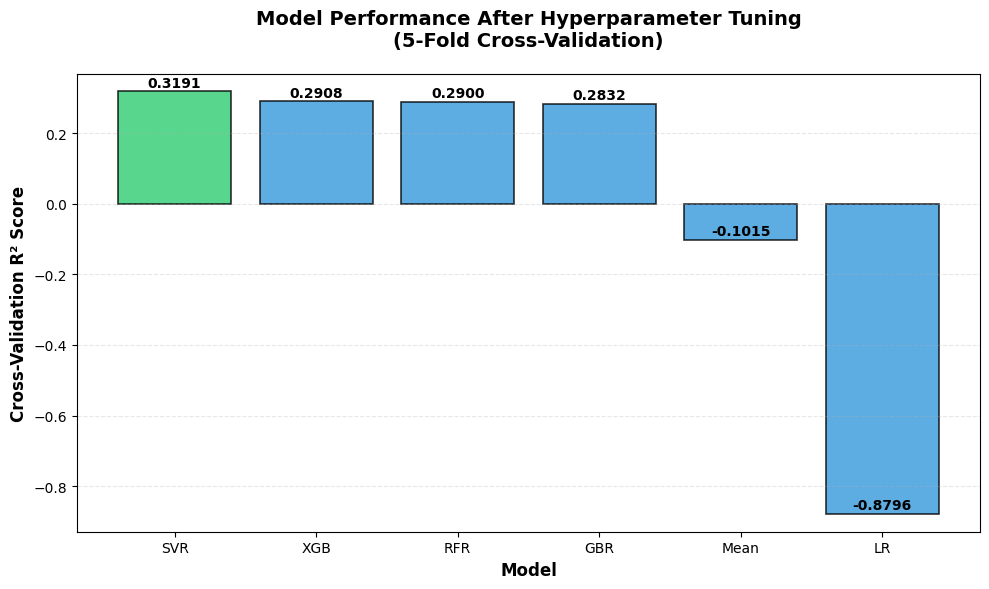


✓ The best performing model is SVR with R² Score: 0.3191


In [15]:
# Visualize the comparison of CV scores after hyperparameter tuning

plt.figure(figsize=(10, 6))

# Sort models by CV score
sorted_models = sorted(cv_scores.items(), key=lambda x: x[1], reverse=True)
model_names = [item[0] for item in sorted_models]
scores = [item[1] for item in sorted_models]

# Create bar plot
colors = ['#2ecc71' if score == max(scores) else '#3498db' for score in scores]
bars = plt.bar(model_names, scores, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

# Add value labels on top of bars
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Customize plot
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Cross-Validation R² Score', fontsize=12, fontweight='bold')
plt.title('Model Performance After Hyperparameter Tuning\n(5-Fold Cross-Validation)', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylim([min(scores) - 0.05, max(scores) + 0.05])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"\n✓ The best performing model is {model_names[0]} with R² Score: {scores[0]:.4f}")

---

# Training

In this part of the code, we are training the machine learning model using the training data. The model learns the relationship between the input features and the target variable by adjusting its internal parameters based on the training data. The goal is to minimize the error between the predicted values and the actual values in the training set.

In [16]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        results[name]['r2'].append(r2_score(y_test, y_pred))
        results[name]['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
        results[name]['mae'].append(np.mean(np.abs(y_test - y_pred)))

---

# Evaluate Model

We use three metrics to evaluate the performance of the model:
* R2 Score: It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. The R2 score ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no relationship between the independent and dependent variables.
* RMSE (Root Mean Squared Error): It is a measure of the differences between values predicted by a model and the values observed. It is the square root of the average of the squared differences between the predicted and actual values.
* MAE (Mean Absolute Error): It is a measure of errors between paired observations expressing the same phenomenon. It is the average of the absolute differences between the predicted and actual values.

In [17]:
for name, metrics in results.items():
    print(f"{name} Results:")
    print(f"Average R-squared: {np.mean(metrics['r2']):.4f} (+/- {np.std(metrics['r2']):.4f})")
    print(f"Average RMSE: {np.mean(metrics['rmse']):.4f} (+/- {np.std(metrics['rmse']):.4f})")
    print(f"Average MAE: {np.mean(metrics['mae']):.4f} (+/- {np.std(metrics['mae']):.4f})")
    print()

Mean Results:
Average R-squared: -0.1015 (+/- 0.0735)
Average RMSE: 9.3383 (+/- 1.3933)
Average MAE: 7.9490 (+/- 1.0660)

LR Results:
Average R-squared: -0.8796 (+/- 0.8057)
Average RMSE: 11.6992 (+/- 1.6344)
Average MAE: 9.2434 (+/- 0.8684)

XGB Results:
Average R-squared: 0.2908 (+/- 0.1514)
Average RMSE: 7.4518 (+/- 1.4279)
Average MAE: 5.9755 (+/- 1.3518)

RFR Results:
Average R-squared: 0.2900 (+/- 0.1475)
Average RMSE: 7.4306 (+/- 1.2076)
Average MAE: 5.9685 (+/- 1.3352)

GBR Results:
Average R-squared: 0.2832 (+/- 0.1584)
Average RMSE: 7.5046 (+/- 1.5537)
Average MAE: 6.1466 (+/- 1.4573)

SVR Results:
Average R-squared: 0.3191 (+/- 0.1418)
Average RMSE: 7.2855 (+/- 1.2520)
Average MAE: 5.8063 (+/- 1.0015)



Based on the results of the evaluation metrics, we can determine how well the model is performing and make adjustments as needed to improve its performance. From the five models, SVR performed the best, with the highest R2 score and lowest RMSE and MAE values.

---

# Check Feature Importance

We want to check, from all of the features, which features are the most important in predicting the target variable. This can help us understand which features have the most impact on the target variable and how they contribute to the model's predictions.

If the coefficients of the features are positive, it means that the feature has a positive impact on the target variable. If the coefficients are negative, it means that the feature has a negative impact (inverse) on the target variable.

We will sort the features based on their coefficients to identify the most important features in the model.

In [18]:
def get_feature_importance(model, model_name, X, y):
    feature_names = model.named_steps['preprocessor'].get_feature_names_out()
    
    if model_name == 'Mean':
        # Mean Regressor doesn't use features, return None
        return None
    elif model_name == 'LR':
        importances = model.named_steps['regressor'].coef_
    elif model_name in ['XGB', 'RFR', 'GBR']:
        importances = model.named_steps['regressor'].feature_importances_
    elif model_name == 'SVR':
        perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=2024)
        importances = perm_importance.importances_mean
    else:
        return None

    feature_importance = dict(zip(feature_names, importances))
    return dict(sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True))

# Visualizing Feature Importance

Understanding which features contribute most to a machine learning model’s predictions is crucial for interpretability and model refinement. In this section, we visualize **feature importance** for each model to see which variables have the greatest influence on the output (`skor_total`).

In [19]:
# Define feature categories based on the dataset
feature_categories = {
    'Demografi': [
        'usia',
        'jenis_kelamin',
        'status_pernikahan',
        'jumlah_anak',
        'usia_anak',
        'kota_asal'
    ],
    
    'Tinggal & Lingkungan Sosial': [
        'tinggal_sendiri',
        'tinggal_pasangan',
        'tinggal_anak',
        'tinggal_ortu',
        'tinggal_mertua',
        'tinggal_saudara',
        'tinggal_teman'
    ],
    
    'Pekerjaan & Karier': [
        'profesi',
        'bidang',
        'jabatan_struktural',
        'jabatan_fungsional',
        'sertifikasi',
        'status_keaktifan',
        'mode_bekerja',
        'jarak',
        'lama_bekerja',
        'waktu_bekerja_seminggu',
        'beban_sks',
        'mhs_bimbingan',
        'gaji_sesuai'
    ],
    
    'Keseimbangan Hidup (Work-Life Balance)': [
        'work_life_balance'
    ],
    
    'Kondisi Fisik': [
        'fisik_mata',
        'fisik_punggung',
        'fisik_tensi',
        'fisik_lemah',
        'fisik_kepala',
        'fisik_obesitas',
        'fisik_imun',
        'fisik_carpal'
    ],
    
    'Kondisi Mental': [
        'mental_anxiety',
        'mental_burnout',
        'mental_depresi',
        'mental_distress',
        'mental_konsentrasi',
        'mental_insomnia',
        'mental_iritate',
        'mental_lelah',
        'mental_stres'
    ]
}

# Create a reverse mapping: feature -> category
feature_to_category = {}
for category, features in feature_categories.items():
    for feature in features:
        feature_to_category[feature] = category

print("Feature categories defined:")
for cat, feats in feature_categories.items():
    print(f"  {cat}: {len(feats)} features")

Feature categories defined:
  Demografi: 6 features
  Tinggal & Lingkungan Sosial: 7 features
  Pekerjaan & Karier: 13 features
  Keseimbangan Hidup (Work-Life Balance): 1 features
  Kondisi Fisik: 8 features
  Kondisi Mental: 9 features


In [20]:
def plot_category_importance(category_name, features_in_category, all_importances, threshold=0.001, show_negative=False, normalize=True):
    """
    Plot feature importance for a specific category with model comparison.
    Only shows features with POSITIVE importance values (>= 0) by default.
    
    Parameters:
    -----------
    category_name : str
        Name of the category (e.g., 'Demografi', 'Kondisi Mental')
    features_in_category : list
        List of feature names in this category
    all_importances : dict
        Dictionary of {model_name: {feature: importance}}
    threshold : float
        Minimum absolute importance to include
    show_negative : bool
        If False (default), only shows features with importance >= 0
        If True, shows all features including negative importance
    normalize : bool
        If True (default), normalize importance values to 0-1 range within each category
        This helps reduce gaps between high and low importance features
    """
    
    # Collect data for plotting
    plot_data = []
    
    for model_name, importances in all_importances.items():
        for feature in features_in_category:
            # Match feature with or without prefix (num__, cat__)
            matched_feature = None
            for full_feature in importances.keys():
                # Try exact match or with common prefixes
                if (full_feature.endswith(feature) or 
                    full_feature == f"num__{feature}" or 
                    full_feature == f"cat__{feature}" or
                    f"__{feature}" in full_feature):
                    matched_feature = full_feature
                    break
            
            if matched_feature:
                importance_value = importances[matched_feature]
                
                # Filter based on threshold and positive/negative setting
                if abs(importance_value) > threshold:
                    # Only include if show_negative=True OR importance >= 0
                    if show_negative or importance_value >= 0:
                        plot_data.append({
                            'Feature': feature,
                            'Model': model_name,
                            'Importance': importance_value
                        })
    
    if not plot_data:
        print(f"No significant POSITIVE features found for category '{category_name}' (threshold={threshold})")
        return
    
    # Convert to DataFrame
    df_plot = pd.DataFrame(plot_data)
    
    # Apply normalization if requested
    if normalize:
        # Normalize within each model to 0-1 range
        df_plot['Importance'] = df_plot.groupby('Model')['Importance'].transform(
            lambda x: (x - x.min()) / (x.max() - x.min()) if (x.max() - x.min()) > 0 else x
        )
    
    # Get unique features and sort by average importance (not absolute, since we only show positive)
    feature_avg_importance = df_plot.groupby('Feature')['Importance'].mean()
    sorted_features = feature_avg_importance.sort_values(ascending=True).index.tolist()
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, max(6, len(sorted_features) * 0.6)))
    
    # Define colors for each model
    model_colors = {
        'Mean': '#95a5a6', # Gray (baseline)
        'LR': '#3498db',   # Blue
        'XGB': '#e74c3c',  # Red
        'RFR': '#2ecc71',  # Green
        'GBR': '#f39c12',  # Orange
        'SVR': '#9b59b6'   # Purple
    }
    
    # Group by feature and model
    num_models = len(all_importances)
    bar_width = 0.15
    
    for i, model_name in enumerate(all_importances.keys()):
        model_data = df_plot[df_plot['Model'] == model_name]
        
        # Create a mapping of feature to importance
        feature_imp_map = dict(zip(model_data['Feature'], model_data['Importance']))
        
        # Get importances in the order of sorted_features
        importances = [feature_imp_map.get(feat, 0) for feat in sorted_features]
        
        # Calculate positions
        positions = np.arange(len(sorted_features)) + i * bar_width
        
        # Plot bars
        ax.barh(positions, importances, bar_width, 
                label=model_name, color=model_colors.get(model_name, '#34495e'), alpha=0.8)
    
    # Customize plot
    ax.set_yticks(np.arange(len(sorted_features)) + bar_width * (num_models - 1) / 2)
    ax.set_yticklabels(sorted_features)
    ax.set_xlabel('Feature Importance' + (' (Normalized 0-1)' if normalize else ''), fontsize=12, fontweight='bold')
    ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
    title_suffix = '\n(Normalized, showing only POSITIVE contributions)' if normalize else '\n(Showing only POSITIVE contributions)'
    ax.set_title(f'Feature Importance Comparison - {category_name}{title_suffix}', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.legend(title='Model', loc='best', frameon=True, shadow=True)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{'='*80}")
    print(f"Category: {category_name}")
    print(f"{'='*80}")
    print(f"Number of features displayed: {len(sorted_features)} (positive importance only)")
    print(f"Models compared: {', '.join(all_importances.keys())}")
    print(f"Normalization: {'Enabled (0-1 scale per model)' if normalize else 'Disabled (raw values)'}")
    print(f"\nTop 3 features (by average importance):")
    for idx, feat in enumerate(sorted_features[-3:][::-1], 1):
        avg_imp = feature_avg_importance[feat]
        print(f"  {idx}. {feat}: {avg_imp:.4f}")
    print()

In [21]:
# Collect all feature importances from all models
all_model_importances = {}
for name, model in models.items():
    importance = get_feature_importance(model, name, X, y)
    if importance:
        all_model_importances[name] = importance

print("Feature importances collected for all models")
print(f"Models: {list(all_model_importances.keys())}")

Feature importances collected for all models
Models: ['LR', 'XGB', 'RFR', 'GBR', 'SVR']


FEATURE IMPORTANCE BY CATEGORY - MODEL COMPARISON

Processing category: Demografi


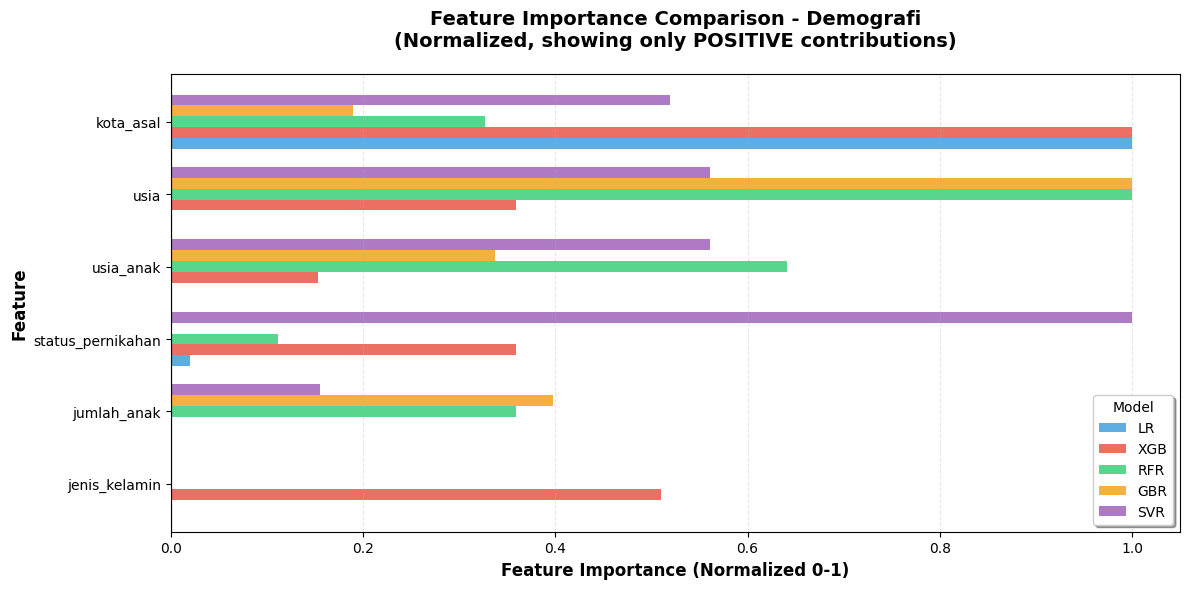


Category: Demografi
Number of features displayed: 6 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. kota_asal: 0.6069
  2. usia: 0.5839
  3. usia_anak: 0.4230


Processing category: Tinggal & Lingkungan Sosial


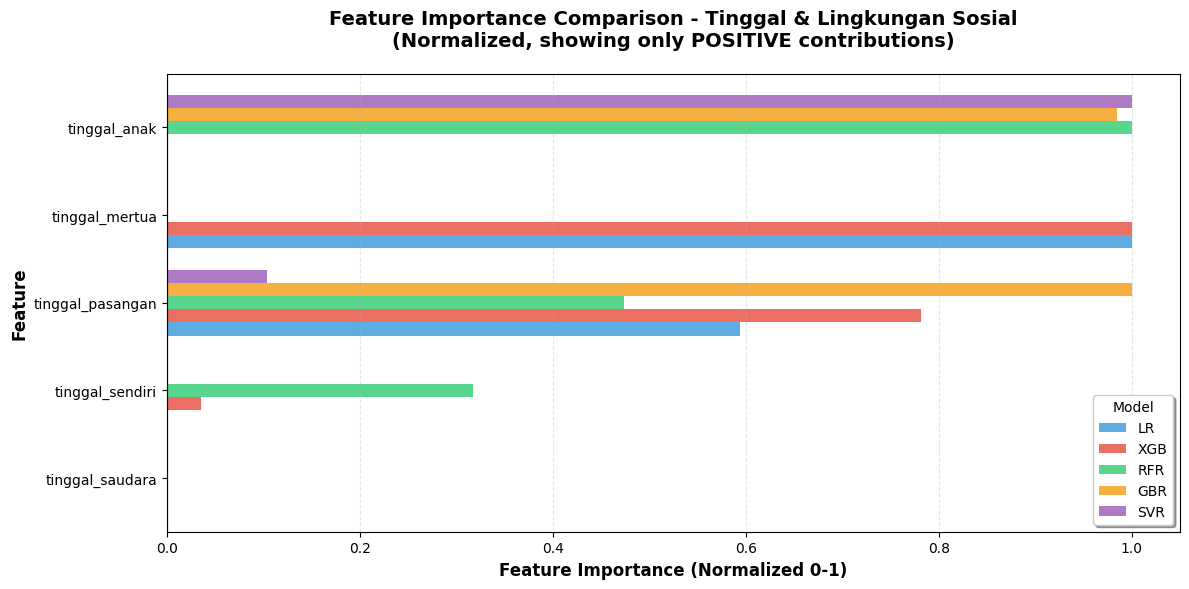


Category: Tinggal & Lingkungan Sosial
Number of features displayed: 5 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. tinggal_anak: 0.7463
  2. tinggal_mertua: 0.6667
  3. tinggal_pasangan: 0.5908


Processing category: Pekerjaan & Karier


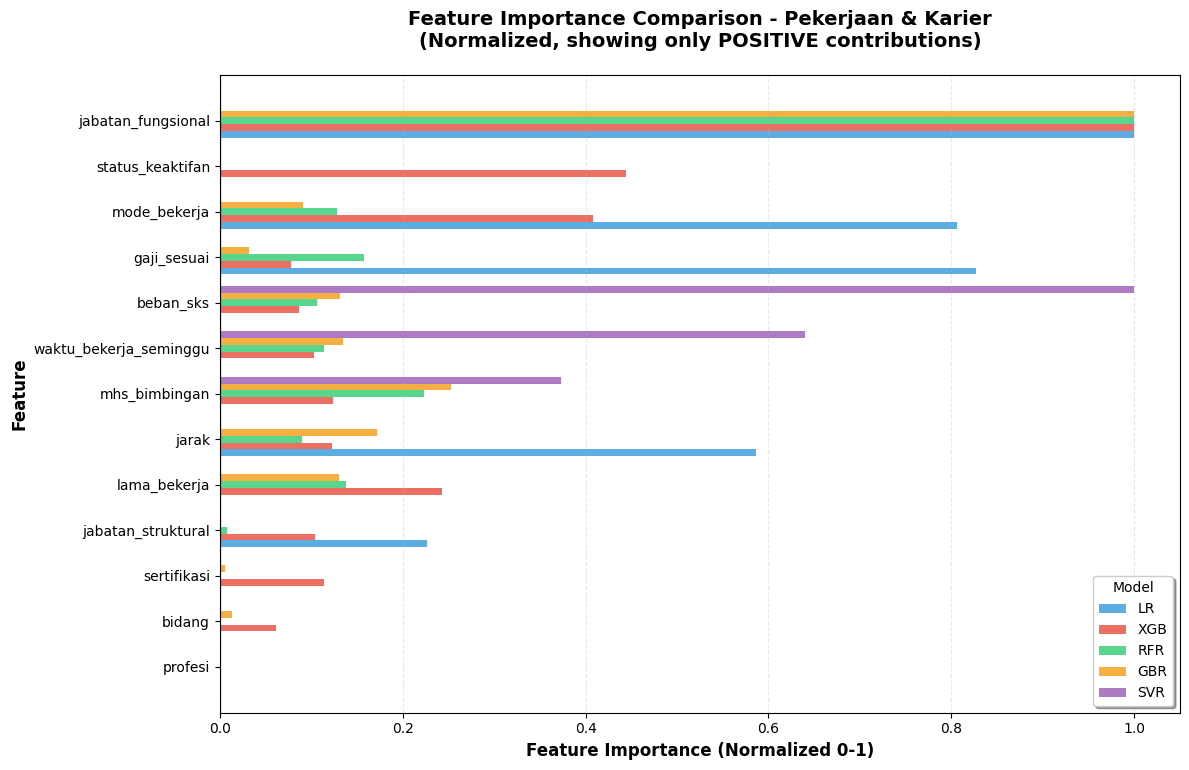


Category: Pekerjaan & Karier
Number of features displayed: 13 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. jabatan_fungsional: 1.0000
  2. status_keaktifan: 0.4444
  3. mode_bekerja: 0.3586


Processing category: Keseimbangan Hidup (Work-Life Balance)


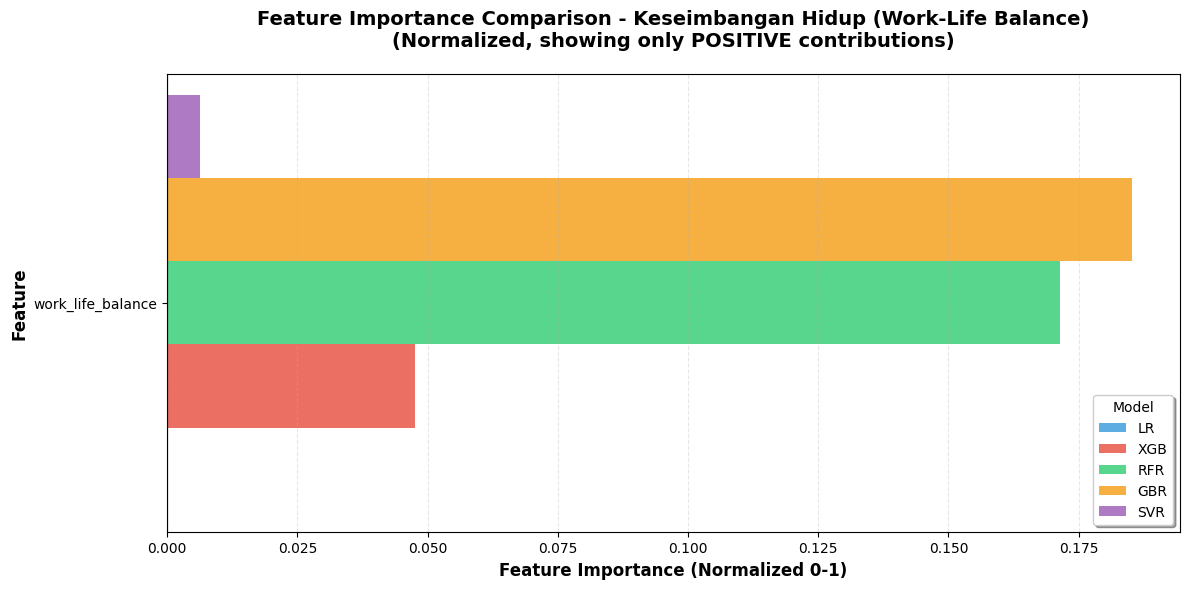


Category: Keseimbangan Hidup (Work-Life Balance)
Number of features displayed: 1 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. work_life_balance: 0.1026


Processing category: Kondisi Fisik


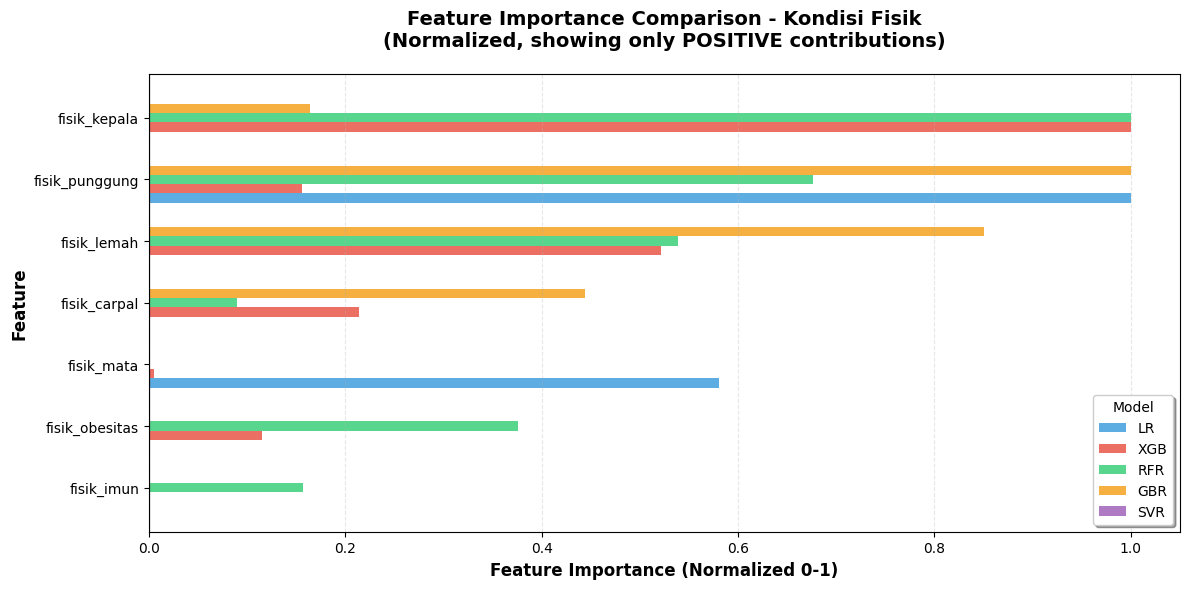


Category: Kondisi Fisik
Number of features displayed: 7 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. fisik_kepala: 0.7215
  2. fisik_punggung: 0.7079
  3. fisik_lemah: 0.6369


Processing category: Kondisi Mental


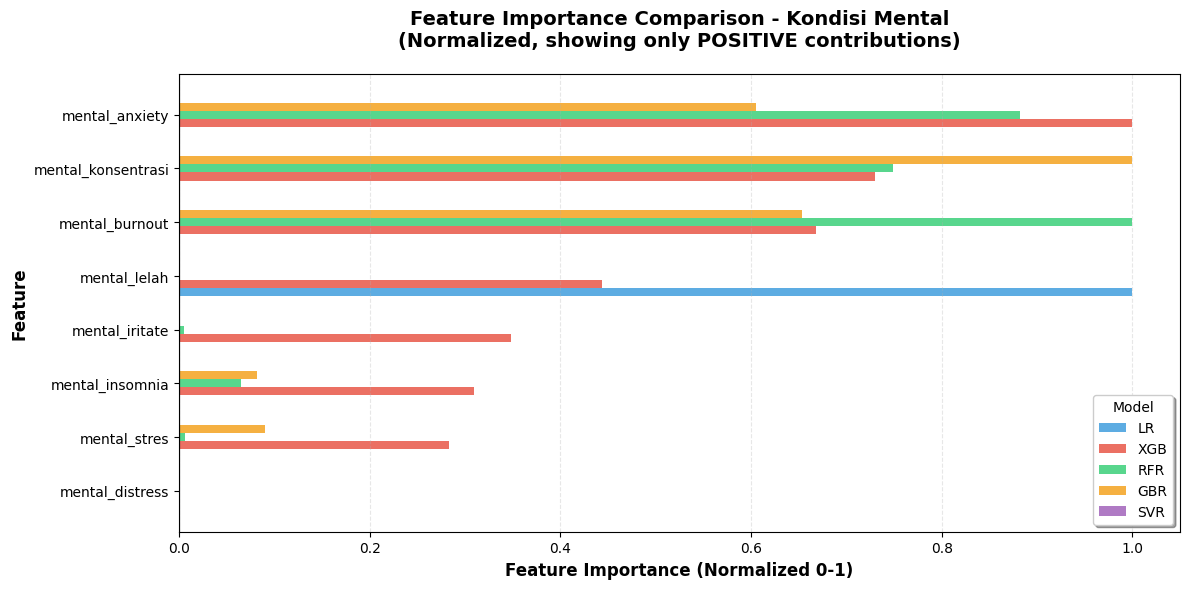


Category: Kondisi Mental
Number of features displayed: 8 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. mental_anxiety: 0.8293
  2. mental_konsentrasi: 0.8265
  3. mental_burnout: 0.5803



In [22]:
# Generate visualizations for each category
print("="*80)
print("FEATURE IMPORTANCE BY CATEGORY - MODEL COMPARISON")
print("="*80)

for category_name, features in feature_categories.items():
    print(f"\n{'='*80}")
    print(f"Processing category: {category_name}")
    print(f"{'='*80}")
    
    # With normalization (default) - easier to compare across models
    plot_category_importance(category_name, features, all_model_importances, 
                            threshold=0.001, normalize=True)
    
    # If you want to see raw values without normalization, use:
    # plot_category_importance(category_name, features, all_model_importances, 
    #                         threshold=0.001, normalize=False)

In [23]:
# Calculate feature importances for all models
# Use the already defined X and y from earlier
feature_importances = {}
for name, model in models.items():
    importance = get_feature_importance(model, name, X, y)
    if importance:
        # Convert to unsorted dict for DataFrame creation
        feature_importances[name] = importance

# Create a DataFrame from the feature importances
df_importance = pd.DataFrame(feature_importances)

# Sort the DataFrame by the average importance across all models
df_importance['avg_importance'] = df_importance.abs().mean(axis=1)  # Use absolute values for averaging
df_importance = df_importance.sort_values('avg_importance', ascending=False)
df_importance = df_importance.drop('avg_importance', axis=1)

# Rename the index to include the categorical labels (cleaner names)
new_index = []
for feature in df_importance.index:
    if feature.startswith('cat__'):
        parts = feature.split('__')
        if len(parts) == 3:
            new_index.append(f"{parts[1]}_{parts[2]}")
        else:
            new_index.append(feature)
    elif feature.startswith('num__'):
        # Remove 'num__' prefix for cleaner names
        new_index.append(feature.replace('num__', ''))
    else:
        new_index.append(feature)
df_importance.index = new_index

# Save the DataFrame to a CSV file
df_importance.to_csv('feature_importance_comparison.csv')

print("Feature importance comparison has been saved to 'feature_importance_comparison.csv'")
print(f"\nTotal features saved: {len(df_importance)}")
print(f"\nTop 10 most important features (by average):")
print(df_importance.abs().mean(axis=1).head(10))

Feature importance comparison has been saved to 'feature_importance_comparison.csv'

Total features saved: 136

Top 10 most important features (by average):
cat__bidang_Teknik Sipil                          1.174679
cat__mental_konsentrasi_True                      1.048836
cat__mental_konsentrasi_False                     1.047633
cat__bidang_Teknik Informatika                    0.908565
cat__kota_asal_Jakarta                            0.896105
cat__bidang_Teknik Elektro                        0.881671
cat__jabatan_fungsional_Lektor                    0.879310
cat__kota_asal_Semarang                           0.870092
cat__jabatan_fungsional_Non Jabatan Fungsional    0.848279
cat__kota_asal_Bogor                              0.780696
dtype: float64
